### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time

from scipy import stats
import statsmodels.api as sm
from bioinfokit.analys import stat

### Data Collection

In [2]:
people = pd.read_csv("people.csv", index_col=0)
people.head()

,Lat,Lon
People,,
0,2.868615,101.673326
1,2.878383,101.607508
2,2.871754,101.599514
3,3.027363,101.652546
4,2.997368,101.626043


In [3]:
ppv = pd.read_csv("ppv.csv", index_col=0)
ppv.head()

,Lat,Lon
PPV,,
0,2.864831,101.694876
1,3.311896,101.585703
2,3.020707,101.650831
3,3.096667,101.706738
4,3.263520,101.470738


### Method 1

In [4]:
def nearest_ppv(df_1, df_2):
    people_lat = np.array(df_1['Lat'].tolist())
    people_lon = np.array(df_1['Lon'].tolist())
    ppv_lat = np.array(df_2['Lat'].tolist())
    ppv_lon = np.array(df_2['Lon'].tolist())
    people_lat = np.deg2rad(people_lat)
    people_lon = np.deg2rad(people_lon)
    ppv_lat = np.deg2rad(ppv_lat)
    ppv_lon = np.deg2rad(ppv_lon)
    diff_lat = people_lat[:,None] - ppv_lat[:]
    diff_lng = people_lon[:,None] - ppv_lon[:]
    d = np.sin(diff_lat/2)**2 + np.cos(people_lat[:,None])*np.cos(ppv_lat[:]) * np.sin(diff_lng/2)**2
    return 2 * 6371 * np.arcsin(np.sqrt(d))

In [5]:
execution_time = {}
for n in range(50):
    # get the start time
    st = time.time()

    people["nearest_ppv_1"] = ppv.loc[ppv.index[np.argmin(nearest_ppv(people, ppv), axis=1)]].index
    people.head()

    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    execution_time[n+1] = elapsed_time

In [7]:
df_execution_time = pd.DataFrame.from_dict(execution_time, orient='index', columns=['time_1'])
df_execution_time

,time_1
1,0.035111
2,0.022871
3,0.021451
4,0.021151
5,0.020858
6,0.021227
7,0.020844
8,0.020834
9,0.021209
10,0.020975


### Method 2

In [28]:
execution_time = {}
len_people = people.shape[0]
len_ppv = ppv.shape[0]
for n in range(50):
    people_to_ppv = []
    st = time.time()
    people_to_ppv = []
    for i in range(len_people):
        dist = []
        people_lat = people['Lat'][i]
        people_lon = people['Lon'][i]
        people_lat = np.deg2rad(people_lat)
        people_lon = np.deg2rad(people_lon)
        for j in range(len_ppv):
            ppv_lat = ppv['Lat'][j]
            ppv_lon = ppv['Lon'][j]
            ppv_lat = np.deg2rad(ppv_lat)
            ppv_lon = np.deg2rad(ppv_lon)
            diff_lat = people_lat - ppv_lat
            diff_lng = people_lon - ppv_lon
            d = np.sin(diff_lat/2)**2 + np.cos(people_lat)*np.cos(ppv_lat) * np.sin(diff_lng/2)**2
            dist.append(2 * 6371 * np.arcsin(np.sqrt(d)))
    #         if j+1 == len(ppv):
        people_to_ppv.append(np.argmin(dist))
    et = time.time()
    elapsed_time = et - st
    #     st = time.time()
    #     people_to_ppv = []
    #     for i in range(len_people):
    #         dist = []
    #         people_lat = people['Lat'][i]
    #         people_lon = people['Lon'][i]
    #         people_lat = np.deg2rad(people_lat)
    #         people_lon = np.deg2rad(people_lon)
    #         for j in range(len_ppv):
    #             ppv_lat = ppv['Lat'][j]
    #             print(ppv_lat)
    #         for j in range(len(ppv)):
    #             ppv_lat = ppv.loc[j, 'Lat']
    #             ppv_lon = ppv.loc[j, 'Lon']
    #             ppv_lat = np.deg2rad(ppv_lat)
    #             ppv_lon = np.deg2rad(ppv_lon)
    #             diff_lat = people_lat - ppv_lat
    #             diff_lng = people_lon - ppv_lon
    #             d = np.sin(diff_lat/2)**2 + np.cos(people_lat)*np.cos(ppv_lat) * np.sin(diff_lng/2)**2
    #             dist.append(2 * 6371 * np.arcsin(np.sqrt(d)))
    #             if j+1 == len(ppv):
    #                 people_to_ppv.append(np.argmin(dist))

    #     # get the end time
    #     et = time.time()

    #     # get the execution time
    #     elapsed_time = et - st
    execution_time[n+1] = elapsed_time

15.915759801864624
16.42660617828369
17.177436113357544
17.746994733810425
17.633383989334106
18.06120777130127
17.787075519561768
17.771057605743408
17.887356281280518
17.697174549102783
17.665189266204834
17.69538450241089
17.62698769569397
17.616637706756592
17.613274097442627
17.808917999267578
17.593491315841675
17.6322660446167
17.550092220306396
17.845459461212158
17.81755304336548
18.205864667892456
17.925901889801025
17.476584911346436
17.88212752342224
17.57548475265503
17.60327458381653
17.947125911712646
17.749282360076904
17.75593066215515
17.688217401504517
17.728384017944336
17.719443559646606
17.817424535751343
17.803689002990723
17.87580704689026
17.85403800010681
17.68679118156433
17.75384259223938
17.67927575111389
17.66198420524597
17.178277254104614
17.796513080596924
17.652616262435913
17.645846605300903
17.738556146621704
17.538063287734985
17.528071403503418
18.096599102020264
17.58911442756653


In [65]:
people["nearest_ppv_2"] = ppv.loc[ppv.index[np.array(people_to_ppv)]].index
people.tail()

,Lat,Lon,nearest_ppv_1,nearest_ppv_2
People,,,,
9995,2.995173,101.695038,40,40
9996,3.006136,101.693904,40,40
9997,2.970721,101.716344,58,58
9998,2.980272,101.644367,2,2
9999,2.942730,101.706985,58,58


In [30]:
df_execution_time["time_2"] = execution_time.values()
df_execution_time.head()

,time_1,time_2
1,0.035111,15.915760
2,0.022871,16.426606
3,0.021451,17.177436
4,0.021151,17.746995
5,0.020858,17.633384


### Method 3

In [66]:
from sklearn.neighbors import KDTree

In [69]:
execution_time
distances = None
indices = None
for n in range(50):
    st = time.time()
    kd = KDTree(ppv[["Lat", "Lon"]].values, metric='euclidean')
    distances, indices = kd.query(people[["Lat", "Lon"]], k = 1)
    et = time.time()
    elapsed_time = et - st
    execution_time[n+1] = elapsed_time

In [70]:
df_execution_time["time_3"] = execution_time.values()
df_execution_time.head()

,time_1,time_2,time_3
1,0.035111,15.915760,0.005276
2,0.022871,16.426606,0.004638
3,0.021451,17.177436,0.004637
4,0.021151,17.746995,0.004487
5,0.020858,17.633384,0.004566


In [ ]:
n_ppv_3 = [x[0] for x in indices]
people["nearest_ppv_3"] = n_ppv_3
people.head()

In [16]:
people.to_csv('people_to_ppv.csv')

In [92]:
df_execution_time.to_csv('execution_time_1.csv') #for computer 1

In [ ]:
df_execution_time.to_csv('execution_time_2.csv') #for computer 2

### Analysis

### Task 1

In [ ]:
df1 = pd.read_csv('execution_time_1.csv', index_col=0) # computer 1
df1.head()

In [ ]:
df2 = pd.read_csv('execution_time_2.csv', index_col=0)  # computer 2
df2.head()

### Task 2

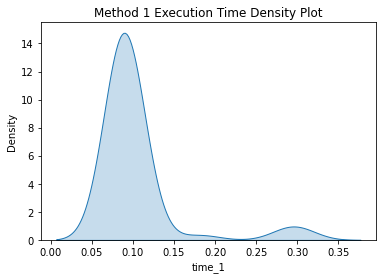

In [95]:
sns.kdeplot(df1['time_1'], shade=True).set(title='Method 1 Execution Time Density Plot')
plt.savefig('Q2_Method1.png')
plt.show()

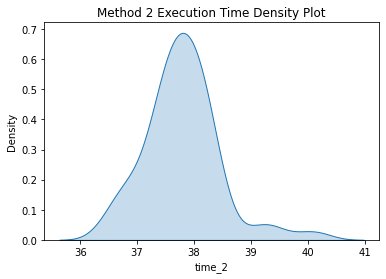

In [96]:
sns.kdeplot(df1['time_2'], shade=True).set(title='Method 2 Execution Time Density Plot')
plt.savefig('Q2_Method2.png')
plt.show()

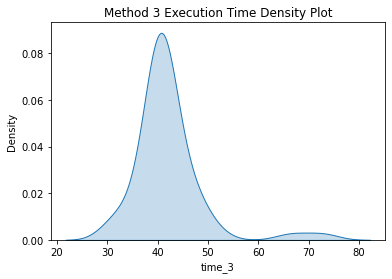

In [97]:
sns.kdeplot(df1['time_3'], shade=True).set(title='Method 3 Execution Time Density Plot')
plt.savefig('Q2_Method3.png')
plt.show()

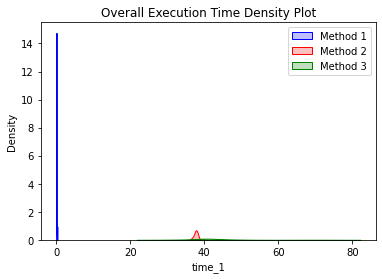

In [98]:
fig = sns.kdeplot(df1['time_1'], shade=True, color="b", label='Method 1').set(title='Overall Execution Time Density Plot')
fig = sns.kdeplot(df1['time_2'], shade=True, color="r", label='Method 2')
fig = sns.kdeplot(df1['time_3'], shade=True, color="g", label='Method 3')
plt.legend()
plt.savefig('Q2_Overall.png')
plt.show()

In [99]:
df_1 = df1['time_1']
df_2 = df1['time_2']
df_3 = df1['time_3']

In [100]:
print(np.var(df_1), np.var(df_2), np.var(df_3))

0.002584347172148318 0.41364445268713146 46.5427376399674


In [101]:
stats.ttest_ind(a=df_1, b=df_2, equal_var=False)

Ttest_indResult(statistic=-408.87603901864696, pvalue=3.490329089101434e-89)

In [102]:
stats.ttest_ind(a=df_1, b=df_3, equal_var=False)

Ttest_indResult(statistic=-43.03606840164349, pvalue=1.3522013764077375e-40)

In [103]:
stats.ttest_ind(a=df_2, b=df_3, equal_var=False)

Ttest_indResult(statistic=-4.351744184167847, pvalue=6.687894604233358e-05)

The p-value obtained from t-test analysis are 3.490329089101434e-89, 1.3522013764077375e-40 and 6.687894604233358e-05. Therefore, we conclude that there are significant differences among the methods. Those p-values are less than alpha = 0.05, we have to reject the null hypothesis of the test. We have sufficient evidence to say that the mean execution time between the three methods is different.